In [3]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [6]:
data = pd.read_csv('/home/sesammquant1/Kaggle/kaggle-fish/data/extract/17_02_03_23:04:04/trainset.csv', sep=';')


In [7]:
features_to_keep = data.columns[3:]
Y = np.array(data[u'gttarget']) - 1
X = np.matrix(data[features_to_keep])

In [8]:
X.shape

(3777, 2051)

In [9]:
def plot_TSNE(X, Y, n_class = 7) :
    l_rate = 1000.0
    for perplexity_value in [ 30, 50, 100] :
            for max_iter  in [200, 500, 1000] :

                my_TSNE = TSNE(n_components=2, perplexity=perplexity_value, early_exaggeration=4.0, learning_rate=l_rate, n_iter=max_iter,
                               n_iter_without_progress=30, min_grad_norm=1e-07, metric='euclidean', init='random',
                               verbose=1, random_state=None, method='barnes_hut', angle=0.5)

                embedding = my_TSNE.fit_transform(X)
                plt.figure(figsize=(5,5))
                
                colors = plt.cm.Dark2(np.linspace(0.1,0.9,n_class))
                for i in range(n_class) :
                    plt.scatter(embedding[Y==i,0], embedding[Y==i,1],  c = colors[i]) #cmap=plt.cm.Blues)
                    
                plt.title('t-SNE embedding with shift , perplexity = %d and n_iter = %d'%(perplexity_value, max_iter))
                plt.show()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3777
[t-SNE] Computed conditional probabilities for sample 2000 / 3777
[t-SNE] Computed conditional probabilities for sample 3000 / 3777
[t-SNE] Computed conditional probabilities for sample 3777 / 3777
[t-SNE] Mean sigma: 5.235295
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.435569
[t-SNE] Error after 200 iterations: 1.435569


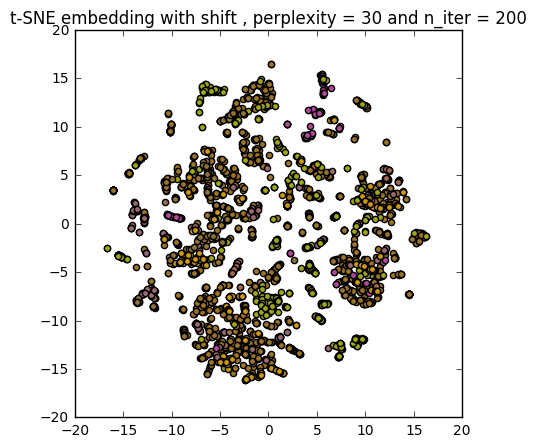

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3777
[t-SNE] Computed conditional probabilities for sample 2000 / 3777
[t-SNE] Computed conditional probabilities for sample 3000 / 3777
[t-SNE] Computed conditional probabilities for sample 3777 / 3777
[t-SNE] Mean sigma: 5.235295
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.440671
[t-SNE] Error after 375 iterations: 1.440671


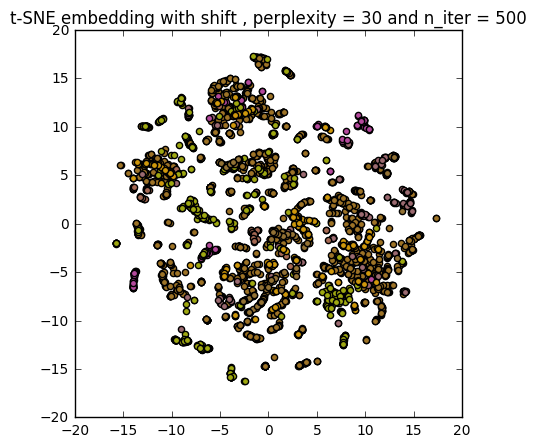

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3777
[t-SNE] Computed conditional probabilities for sample 2000 / 3777
[t-SNE] Computed conditional probabilities for sample 3000 / 3777
[t-SNE] Computed conditional probabilities for sample 3777 / 3777
[t-SNE] Mean sigma: 5.235295


KeyboardInterrupt: 

In [16]:
plot_TSNE(X,Y)

Done for n_cluster = 2
Done for n_cluster = 3
Done for n_cluster = 4
Done for n_cluster = 5
Done for n_cluster = 6
Done for n_cluster = 7
Done for n_cluster = 8
Done for n_cluster = 9
Done for n_cluster = 10
Done for n_cluster = 11
Done for n_cluster = 12
Done for n_cluster = 13
Done for n_cluster = 14
Done for n_cluster = 15
Done for n_cluster = 16
Done for n_cluster = 17
Done for n_cluster = 18
Done for n_cluster = 19
Done for n_cluster = 20
Done for n_cluster = 21
Done for n_cluster = 22
Done for n_cluster = 23
Done for n_cluster = 24
Done for n_cluster = 25
Done for n_cluster = 26
Done for n_cluster = 27
Done for n_cluster = 28
Done for n_cluster = 29


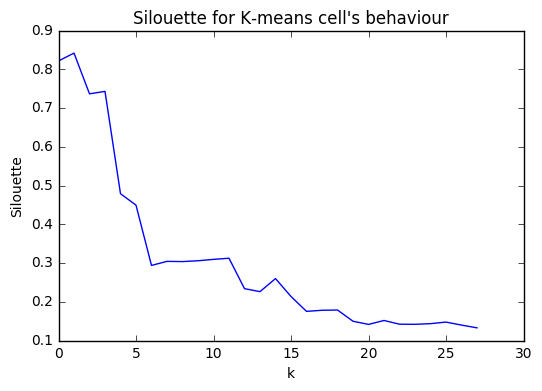

In [10]:
from sklearn.metrics import silhouette_score

s = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(silhouette_score(X, labels, metric='euclidean'))
    print 'Done for n_cluster = %d'%(n_clusters)
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")


Done for n_cluster = 30
Done for n_cluster = 31
Done for n_cluster = 32
Done for n_cluster = 33
Done for n_cluster = 34


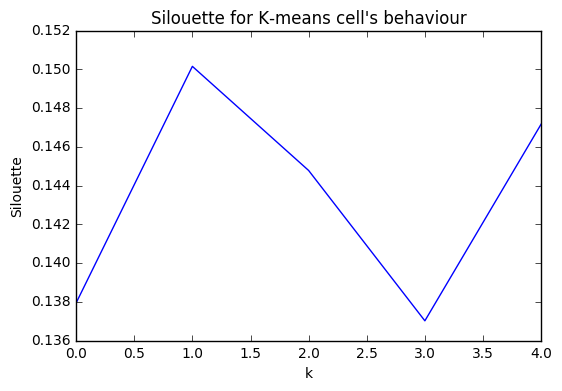

In [11]:

s = []
for n_clusters in range(30,35):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(silhouette_score(X, labels, metric='euclidean'))
    print 'Done for n_cluster = %d'%(n_clusters)
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")


In [12]:
K = 25
kmeans = KMeans(n_clusters=K)
kmeans.fit(X)

labels = kmeans.labels_

In [13]:
meta_data = data[["gttarget" , "gtclass", "path"]]
meta_data['Kmeans'] = labels

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
meta_data.to_csv('/home/sesammquant1/Kaggle/kaggle-fish/data/processed/kmeans_clusters.csv', index=None)

In [43]:
for i in range(20) :
    meta_data[meta_data['Kmeans']==0]['path'].sort_values().iloc[i].split('/', 5)[-1]